problem statement 1 :
____________________________________________________________________________________________________________________________
We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

Task:
1.fitting it to the periodic function
2.plot the fit

Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
____________________________________________________________________________________________

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d = {
    "Max" : pd.Series([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]) ,
    "Min" : pd.Series([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]),
    "Month" : pd.Series([1,2,3,4,5,6,7,8,9,10,11,12])
}
df = pd.DataFrame(d)
df

,Max,Min,Month
0,39,21,1
1,41,23,2
2,43,27,3
3,47,28,4
4,49,32,5
5,51,35,6
6,45,31,7
7,38,28,8
8,37,21,9
9,29,19,10


Text(0, 0.5, 'Temperature')

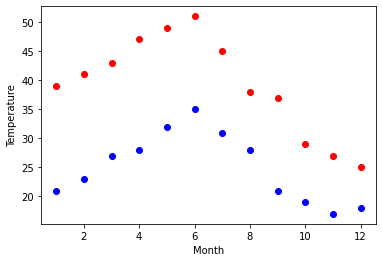

In [3]:
plt.plot(df["Month"],df["Max"],'ro')
plt.plot(df["Month"],df['Min'],'bo')
plt.xlabel("Month")
plt.ylabel("Temperature")

In [4]:
from scipy import optimize
import numpy as np
def yearlytemps(times, avg, ampl, time_offset):
    x = (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
    return x

r_max, c_max = optimize.curve_fit(yearlytemps, df["Month"],df["Max"], [20, 10, 0])
r_min, c_min = optimize.curve_fit(yearlytemps, df["Month"],df["Min"], [-40, 20, 0])

Text(0, 0.5, 'Temperature')

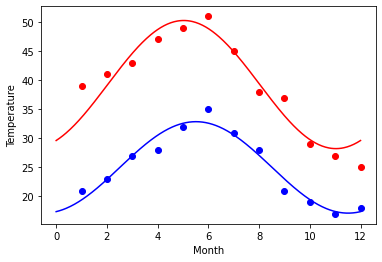

In [5]:
days = np.linspace(0, 12, num=365)
plt.plot(df["Month"], df["Max"], 'ro')
plt.plot(days, yearlytemps(days, *r_max), 'r-')
plt.plot(df["Month"], df["Min"], 'bo')
plt.plot(days, yearlytemps(days, *r_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

problem statement 2 :
___________________________________________________________________________________________________________
This assignment is for visualization using matplotlib:

data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
____________________________________________________________________________________________________________

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv" 
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
count = titanic["sex"].value_counts()

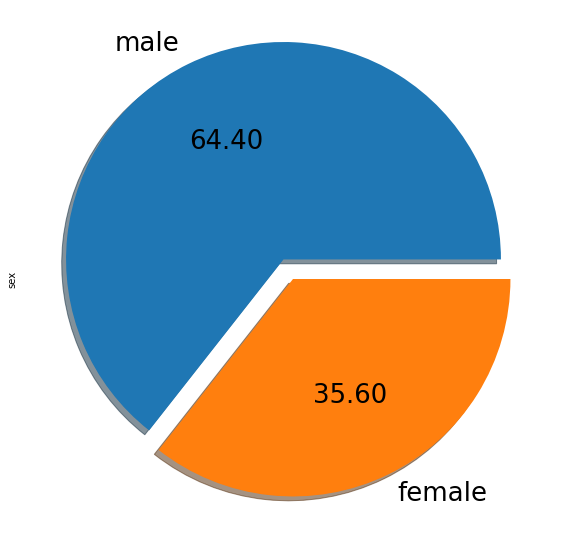

In [10]:
count.plot.pie(figsize = (10,10),fontsize = 26, autopct = '%.2f',explode = [0.1 , 0], shadow = True)

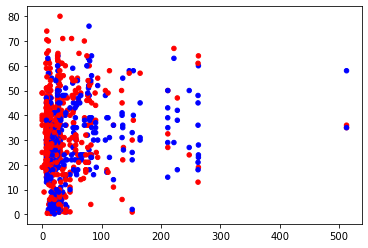

In [11]:
#by using matplotlib 
colors = {'male':'red', 'female':'blue'}
plot = plt.scatter(titanic.fare.iloc[:-1],titanic.age.iloc[:-1],c=titanic['sex'].iloc[:-1].apply(lambda x: 
        colors[x]),s = 20)

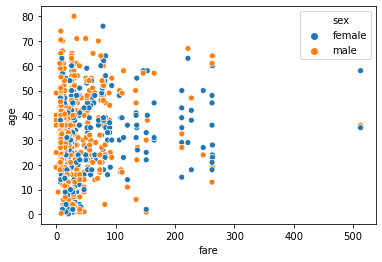

In [12]:
#by using seaborn 
sns.scatterplot(x = "fare" , y = "age" , data = titanic ,hue = "sex")